#### 1- Sort Touples With Lambda

In [93]:
def sort(touples):
    return sorted(touples, key=lambda touples : (touples[0], touples[1]))

# Test Case
t = ((3,4), (5,3), (2,10), (5,2))
print(sort(t))

[(2, 10), (3, 4), (5, 2), (5, 3)]


#### 2- Merge Sort

In [94]:
def merge_sort(data):
    n = len(data)
    if n == 1: # base case
        return data
    mid = n // 2
    l = merge_sort(data[:mid])
    r = merge_sort(data[mid:])
    return merger(l,r)

def merger(l, r):
    n, m = len(l), len(r)
    i, j = 0, 0
    res = []
    while i < n and j < m:
        if l[i] <= r[j]:
            res.append(l[i])
            i += 1
        else:
            res.append(r[j])
            j += 1
    while i < n:
        res.append(l[i])
        i += 1
    while j < m:
        res.append(r[j])
        j += 1
    return res

# Test Case:
data = [3, 5, 2, 1, 5, 6, 8]
print(merge_sort(data))


[1, 2, 3, 5, 5, 6, 8]


#### 3- Heap Sort

In [95]:
def heap_sort(data):
    n = len(data)
    for i in range(n, -1, -1):
        heapify(data, i, n)
    for i in range(n-1, 0, -1):
        data[0], data[i] = data[i], data[0]
        heapify(data, 0, i)
    return data

def heapify(data, i, n):
    lowest_idx = i
    l = 2*i + 1
    r = 2*i + 2
    if l < n and data[l] > data[lowest_idx]:
        lowest_idx = l
    if r < n and data[r] > data[lowest_idx]:
        lowest_idx = r
    if lowest_idx != i:
        data[i], data[lowest_idx] = data[lowest_idx], data[i]
        heapify(data, lowest_idx, n)


# Test Case:
data = [3, 5, 2, 1, 5, 6, 8]
print(heap_sort(data))


[1, 2, 3, 5, 5, 6, 8]


#### 4- Unique Permutation

In [96]:
from itertools import permutations
def unique_permutation(data):
    return list(set(permutations(data)))

# Test Case:
data = [1,1,0,0]
print(unique_permutation(data))

[(0, 1, 0, 1), (1, 1, 0, 0), (0, 1, 1, 0), (1, 0, 1, 0), (1, 0, 0, 1), (0, 0, 1, 1)]


#### 5- Find Subsets

In [97]:
from itertools import chain, combinations
def get_subsets(data):
    return list(chain.from_iterable(combinations(data, i) for i in range(len(data)+1)))

#Test Case
data = [1,1,0,0]
print(get_subsets(data))

[(), (1,), (1,), (0,), (0,), (1, 1), (1, 0), (1, 0), (1, 0), (1, 0), (0, 0), (1, 1, 0), (1, 1, 0), (1, 0, 0), (1, 0, 0), (1, 1, 0, 0)]


#### 6- Tree Problem: Check if a tree is balanced
A tree is balanced is if the height of the left and right nodes are at most +1 different

In [98]:
class Node:
    def __init__(self, data):
        self.data = data
        self.right = None
        self.left = None

class Tree:
    def __init__(self, data):
        self.root = Node(data)        

    def get_height(self, r):
        if r is None:
            return 0
        return 1 + max(self.get_height(r.left), self.get_height(r.right))
    
    def is_balanced(self, r):
        if r is None:
            return True
        return (self.is_balanced(r.left) and 
                self.is_balanced(r.right) and
                abs(self.get_height(r.left) - self.get_height(r.right)) <= 1
            )

# Test Case:
tree = Tree(1)
tree.root.left = Node(2)
tree.root.left.right = Node(4)
tree.root.left.right.left = Node(6)
tree.root.right = Node(3)
tree.root.right.right = Node(5)
tree.root.right.right.right = Node(7)


print("Tree height is : ", tree.get_height(tree.root))

print("Tree is balanced? ", tree.is_balanced(tree.root))     

Tree height is :  4
Tree is balanced?  False


#### 7- Thief Problem
he thief has found himself a new place for his thievery. There is only one entrance to this area, called root.

Besides the root, each house has one and only one parent house. After a tour, the smart thief realized that all houses in this place form a binary tree. It will automatically contact the police if two directly-linked houses were broken into on the same night.

Given the root of the binary tree, return the maximum amount of money the thief can rob without alerting the police.

Example 1:

Input: root = [3,2,3,null,3,null,1]
Output: 7
Explanation: Maximum amount of money the thief can rob = 3 + 3 + 1 = 7.

In [99]:
class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None
class Tree:
    def __init__(self, data):
        self.root = Node(data)
    def getTheifMax(self, root):
        def dfs(root):
            if root is None:
                return [0, 0]                
            l = dfs(root.left)
            r = dfs(root.right)
            return [root.data + l[1] + r[1], max(l) + max(r)]
        return max(dfs(root))
    
# Test Case:
tree = Tree(3)
tree.root.left = Node(2)
tree.root.right = Node(3)
tree.root.left.right = Node(3)
tree.root.right.right = Node(1)   

print(tree.getTheifMax(tree.root))

7


#### 8- Graph: DFS

In [100]:
class Graph:
    def __init__(self, graph):
        n = len(graph)
        self.graph = graph
        self.visited = []
    def dfs_search(self, node):
        if node not in self.visited:
            self.visited.append(node)
            for n in graph[node]:
                self.dfs_search(n)


graph = {
    'A' : ['B','S'],
    'B' : ['A'],
    'C' : ['D','E','F','S'],
    'D' : ['C'],
    'E' : ['C','H'],
    'F' : ['C','G'],
    'G' : ['F','S'],
    'H' : ['E','G'],
    'S' : ['A','C','G']
}           

g = Graph(graph)
g.dfs_search('A')
print(g.visited)

['A', 'B', 'S', 'C', 'D', 'E', 'H', 'G', 'F']


#### 9- Graph: BFS

In [101]:
class Graph:
    def __init__(self, graph):
        self.graph = graph
        self.visited = []
        self.q = []
    def bfs_search(self,root):
        if root not in self.visited:
            self.q.append(root)
        while len(self.q) > 0:
            popped = self.q.pop(0)
            if popped not in self.visited:
                self.visited.append(popped)
                for n in self.graph[popped]:
                    if n not in self.visited:
                        self.q.append(n)

# Test Case
graph = {
    'A' : ['B','S'],
    'B' : ['A'],
    'C' : ['D','E','F','S'],
    'D' : ['C'],
    'E' : ['C','H'],
    'F' : ['C','G'],
    'G' : ['F','S'],
    'H' : ['E','G'],
    'S' : ['A','C','G']
}           

g = Graph(graph)
g.bfs_search('A')
print(g.visited)

['A', 'B', 'S', 'C', 'G', 'D', 'E', 'F', 'H']


#### 10- Graph: Cycle Identification
To find cycle in a directed graph we can use the Depth First Traversal (DFS) technique. It is based on the idea that there is a cycle in a graph only if there is a back edge [i.e., a node points to one of its ancestors] present in the graph.

To detect a back edge, we need to keep track of the nodes visited till now and the nodes that are in the current recursion stack [i.e., the current path that we are visiting]. If during recursion, we reach a node that is already in the recursion stack, there is a cycle present in the graph.

In [102]:
class Graph:
    def __init__(self, graph):
        self.graph = graph
        self.visited = []
        self.isCycliccal = False
    def has_cycle(self, root):
        if root not in self.visited and self.isCycliccal == False:
            self.visited.append(root)
            for n in self.graph[root]:
                if n in self.visited:
                    self.isCycliccal = True      
                    break              
                else:
                    self.has_cycle(n)
        return self.isCycliccal

        
# Test Case
graph = {
    'A' : ['B','S'],
    'B' : ['A'],
    'C' : ['D','E','F','S'],
    'D' : ['C'],
    'E' : ['C','H'],
    'F' : ['C','G'],
    'G' : ['F','S'],
    'H' : ['E','G'],
    'S' : ['A','C','G']
}           

g = Graph(graph)
print(g.has_cycle('H'))
print(g.visited)

True
['H', 'E', 'C', 'D']


#### 11- Graph: Dijkstra
For Dijkstra’s algorithm, it is always recommended to use Heap (or priority queue).

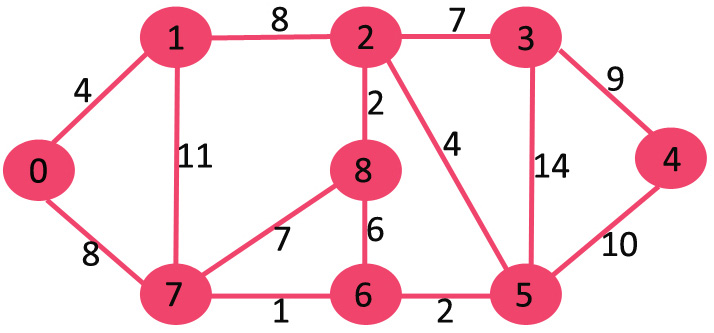

In [103]:
import heapq
iPair = tuple

class Graph:
    def __init__(self, v):
        self.v = v
        self.adj = [[] for _ in range(v)]
    
    def addEdge(self, u, v, w):
        self.adj[u].append((v, w))
        self.adj[v].append((u, w))

    def get_dijkstra_shortest_path(self, root):
        # Create a priority queue to store vertices that are being preprocessed
        priority_q = []
        heapq.heappush(priority_q, (0, root))
        # Create a vector for distances and initialize all distances as infinite (INF)
        dist = [float('inf')] * self.v
        dist[root] = 0

        while priority_q:
            # The first vertex in pair is the minimum distance
            # vertex label is stored in second of pair
            d, u = heapq.heappop(priority_q)

            # 'i' is used to get all adjacent vertices of a vertex
            for v, weight in self.adj[u]:
                # If there is shorted path to v through u.
                if dist[v] > dist[u] + weight:
                    # Updating distance of v
                    dist[v] = dist[u] + weight
                    heapq.heappush(priority_q, (dist[v], v))
 
        # Print shortest distances stored in dist[]
        for i in range(self.v):
            print(f'v: {i} -> d: {dist[i]}')  

# Test Case
V = 9
g = Graph(V)

# making above shown graph
g.addEdge(0, 1, 4)
g.addEdge(0, 7, 8)
g.addEdge(1, 2, 8)
g.addEdge(1, 7, 11)
g.addEdge(2, 3, 7)
g.addEdge(2, 8, 2)
g.addEdge(2, 5, 4)
g.addEdge(3, 4, 9)
g.addEdge(3, 5, 14)
g.addEdge(4, 5, 10)
g.addEdge(5, 6, 2)
g.addEdge(6, 7, 1)
g.addEdge(6, 8, 6)
g.addEdge(7, 8, 7)

g.get_dijkstra_shortest_path(0)

v: 0 -> d: 0
v: 1 -> d: 4
v: 2 -> d: 12
v: 3 -> d: 19
v: 4 -> d: 21
v: 5 -> d: 11
v: 6 -> d: 9
v: 7 -> d: 8
v: 8 -> d: 14



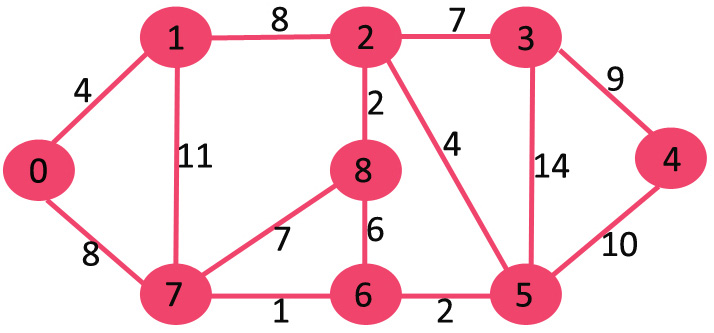

#### 12 - Rat in the Maze

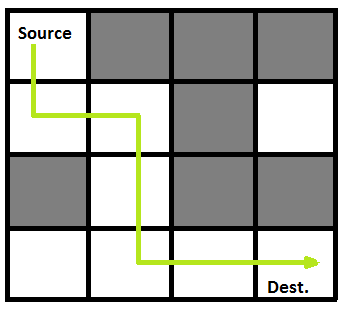

In [104]:
N = 4

def solve_maze(maze):
    
    sol = [[0 for _ in range(N)] for _ in range(N)]
    x, y = 0, 0
    if solve_maze_util(maze, x, y, sol) == False:
        print('There are no solutions..')
        return False
    print_maze_sol(sol)
    return True

def solve_maze_util(maze, x, y, sol):

    if x == N-1 and y == N-1:
        sol[x][y] = 1
        return True

    if(isSafe(maze, x, y)):
        # mark x, y as part of solution path
        sol[x][y] = 1

        # Move forward in x direction
        if(solve_maze_util(maze, x+1, y, sol)):
            return True

        # If moving in x direction doesn't give solution
        # then Move down in y direction
        if(solve_maze_util(maze, x, y+1, sol)):
            return True

        # If none of the above movements work then
        # BACKTRACK: unmark x, y as part of solution path
        sol[x][y] = 0
        return False
    
def isSafe(maze,  x, y):
    if x < N and y < N and x >=0 and y >= 0 and maze[x][y] == 1:
        return True
    return False

def print_maze_sol(sol):
    for i in sol:
        for j in i:
            print(str(j) + " ", end ="")
        print("")

# Test Case:
maze = [[1, 0, 0, 0],
        [1, 1, 0, 1],
        [0, 1, 0, 0],
        [1, 1, 1, 1] ]
              
solve_maze(maze)

1 0 0 0 
1 1 0 0 
0 1 0 0 
0 1 1 1 


True

#### 13 - n-queen Problem

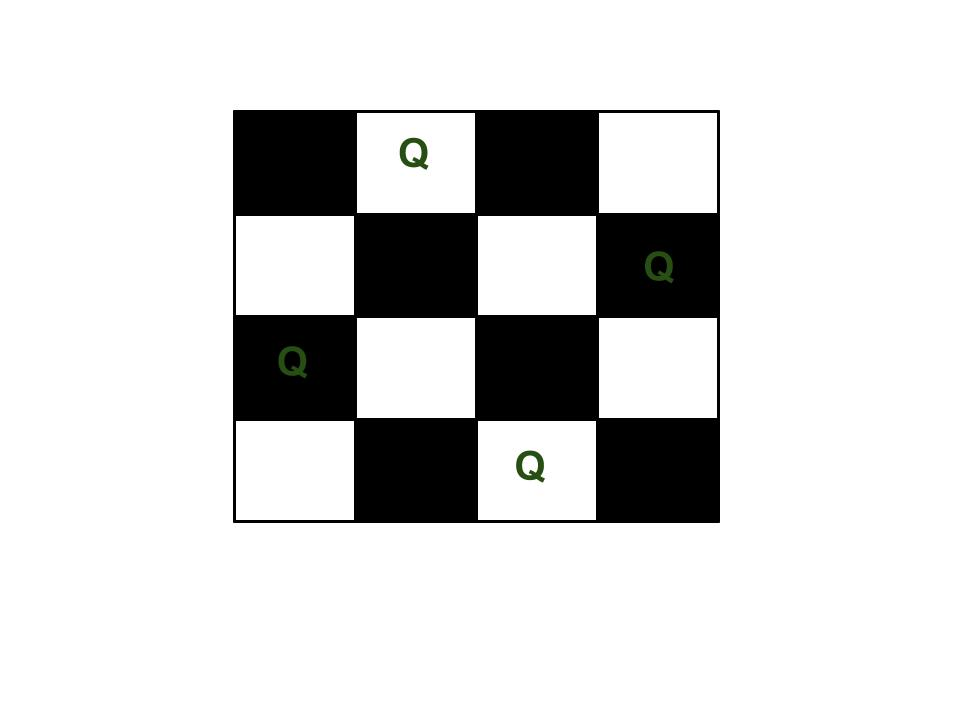

In [105]:
N = 4

def is_n_queen():
    board = [[0] *N] *N # make sure not to make this mistake as all the inner lists are actually references to the same list in memory
    board = [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
    if n_queen_util(board, 0) == False:
        print('There is no solution for board size ', N)
        return False

    n_queen_print_board(board)    
    return True

def n_queen_util(board, col):
    # Base case: If all queens are placed
    # then return true
    if col >= N:
        return True
    
    # Consider this column and try placing
    # this queen in all rows one by one
    for i in range(N):
 
        if isSafe(board, i, col):
 
            # Place this queen in board[i][col]
            board[i][col] = 1
 
            # Recur to place rest of the queens
            if n_queen_util(board, col+1) == True:
                return True
 
            # If placing queen in board[i][col
            # doesn't lead to a solution, then
            # queen from board[i][col]
            board[i][col] = 0
 
    # If the queen can not be placed in any row in
    # this column col then return false
    return False

def isSafe(board, row, col):
    # check the same row to see if there are any other queens
    for i in range(col):
        if board[row][i] == 1:
            return False
    
    # Check upper diagonal on left side
    for i, j in zip(range(row, -1, -1),
                    range(col, -1, -1)):
        if board[i][j] == 1:
            return False
 
    # Check lower diagonal on left side
    for i, j in zip(range(row, N, 1),
                    range(col, -1, -1)):
        if board[i][j] == 1:
            return False
 
    return True


def n_queen_print_board(board):
    for i in range(N):
        for j in range(N):
            if board[i][j] == 1:
                print("Q",end=" ")
            else:
                print(".",end=" ")
        print()


# Test Case
is_n_queen()


. . Q . 
Q . . . 
. . . Q 
. Q . . 


True

#### 14- Euler Path

A path in a graph that visits every edge exactly once. Eulerian Circuit is an Eulerian Path that starts and ends on the same vertex. 

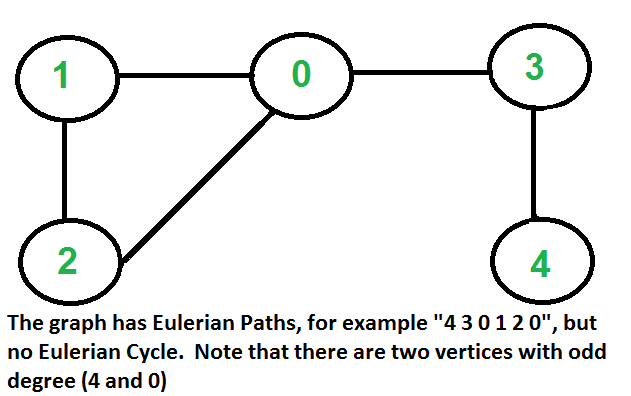


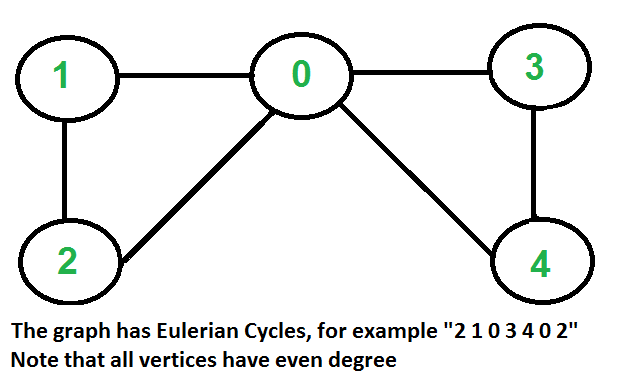


A graph is called Eulerian if it has an Eulerian Cycle and called Semi-Eulerian if it has an Eulerian Path. The problem seems similar to Hamiltonian Path which is NP complete problem for a general graph. Fortunately, we can find whether a given graph has a Eulerian Path or not in polynomial time. 

- Time Complexity: O(V+E)
- Space Complexity: O(V+E)

Eulerian Cycle: An undirected graph has Eulerian cycle if following two conditions are true. 

- All vertices with non-zero degree (how many connections or neighbors a particular vertex has) are connected. We don’t care about vertices with zero degree because they don’t belong to Eulerian Cycle or Path (we only consider all edges). 
- All vertices have even degree.


Eulerian Path: An undirected graph has Eulerian Path if following two conditions are true. 

- Same as condition (a) for Eulerian Cycle.
- If zero or two vertices have odd degree and all other vertices have even degree. Note that only one vertex with odd degree is not possible in an undirected graph (sum of all degrees is always even in an undirected graph)


In [106]:
from collections import defaultdict
class Graph:
    def __init__(self, v):
        self.V = v        
        self.graph = defaultdict(list)

    def addEdge(self, u, v):
        self.graph[u].append(v)
        self.graph[v].append(u)

    '''The function returns one of the following values
       0 --> If graph is not Eulerian
       1 --> If graph has an Euler path (Semi-Eulerian)
       2 --> If graph has an Euler Circuit (Eulerian)  '''
    def isEulerian(self):
        # Check if all non-zero degree vertices are connected
        if self.isConnected() == False:
            return 0
        else:
            # Count vertices with odd degree
            odd = 0
            for i in range(self.V):
                if len(self.graph[i]) % 2 != 0:
                    odd += 1
 
            '''If odd count is 2, then semi-eulerian.
            If odd count is 0, then eulerian
            If count is more than 2, then graph is not Eulerian
            Note that odd count can never be 1 for undirected graph'''
            if odd == 0:
                return 2
            elif odd == 2:
                return 1
            elif odd > 2:
                return 0
    
    '''Method to check if all non-zero degree vertices are
    connected. It mainly does DFS traversal starting from
    node with non-zero degree'''
    def isConnected(self):
 
        # Mark all the vertices as not visited
        visited = [False]*(self.V)
 
        #  Find a vertex with non-zero degree
        for i in range(self.V):
            if len(self.graph[i]) != 0:
                break
 
        # If there are no edges in the graph, return true
        if i == self.V-1:
            return True
 
        # Start DFS traversal from a vertex with non-zero degree
        self.DFSUtil(i, visited)
 
        # Check if all non-zero degree vertices are visited
        for i in range(self.V):
            if visited[i] == False and len(self.graph[i]) > 0:
                return False
            
    # A function used by isConnected
    def DFSUtil(self, v, visited):
        # Mark the current node as visited
        visited[v] = True
 
        # Recur for all the vertices adjacent to this vertex
        for i in self.graph[v]:
            if visited[i] == False:
                self.DFSUtil(i, visited)
 
        return True
    

    def test(self):
        res = self.isEulerian()
        if res == 0:
            print("graph is not Eulerian")
        elif res == 1:
            print("graph has a Euler path")
        else:
            print("graph has a Euler cycle")
 

 # Test Case
g1 = Graph(5)
g1.addEdge(1, 0)
g1.addEdge(0, 2)
g1.addEdge(2, 1)
g1.addEdge(0, 3)
g1.addEdge(3, 4)
g1.test()
 
g2 = Graph(5)
g2.addEdge(1, 0)
g2.addEdge(0, 2)
g2.addEdge(2, 1)
g2.addEdge(0, 3)
g2.addEdge(3, 4)
g2.addEdge(4, 0)
g2.test()
 
g3 = Graph(5)
g3.addEdge(1, 0)
g3.addEdge(0, 2)
g3.addEdge(2, 1)
g3.addEdge(0, 3)
g3.addEdge(3, 4)
g3.addEdge(1, 3)
g3.test()
 
# Let us create a graph with 3 vertices
# connected in the form of cycle
g4 = Graph(3)
g4.addEdge(0, 1)
g4.addEdge(1, 2)
g4.addEdge(2, 0)
g4.test()
 
# Let us create a graph with all vertices
# with zero degree
g5 = Graph(3)
g5.test()
 

graph has a Euler path
graph has a Euler cycle
graph is not Eulerian
graph has a Euler cycle
graph has a Euler cycle


#### 14- Hamiltonian Path

Hamiltonian Path – A simple path in a graph G  that passes through every vertex exactly once is called a Hamiltonian path. 

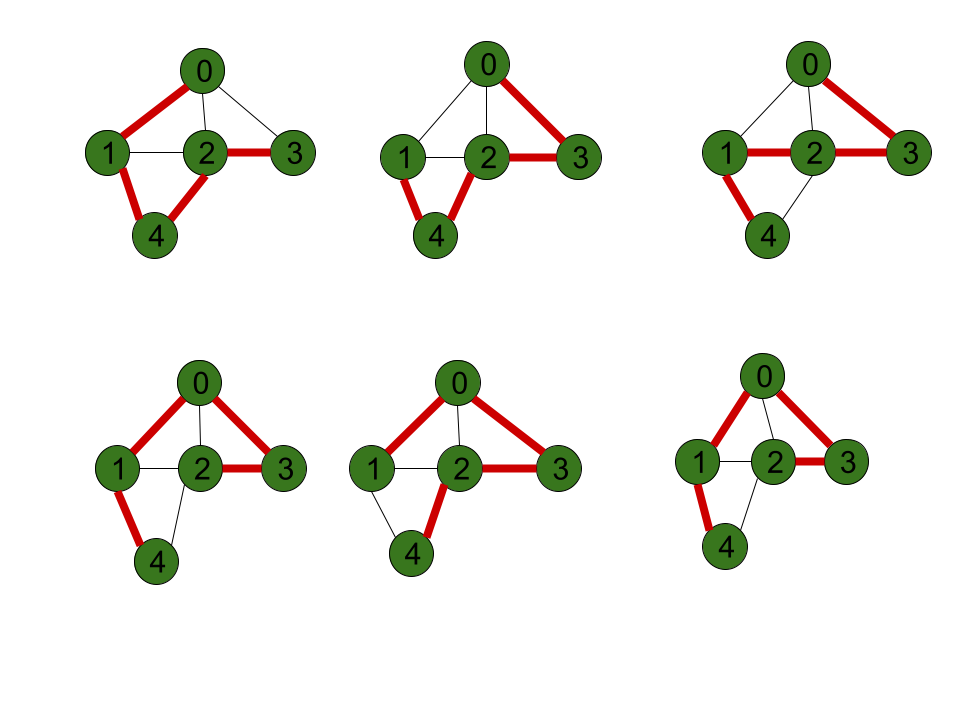

In [107]:
def Hamiltonian_path(adj, N):
     
    dp = [[False for i in range(1 << N)]
                 for j in range(N)]
 
    # Set all dp[i][(1 << i)] to
    # true
    for i in range(N):
        dp[i][1 << i] = True
 
    # Iterate over each subset
    # of nodes
    for i in range(1 << N):
        for j in range(N):
 
            # If the jth nodes is included
            # in the current subset
            if ((i & (1 << j)) != 0):
 
                # Find K, neighbour of j
                # also present in the
                # current subset
                for k in range(N):
                    if ((i & (1 << k)) != 0 and
                             adj[k][j] == 1 and
                                     j != k and
                          dp[k][i ^ (1 << j)]):
                         
                        # Update dp[j][i]
                        # to true
                        dp[j][i] = True
                        break
     
    # Traverse the vertices
    for i in range(N):
 
        # Hamiltonian Path exists
        if (dp[i][(1 << N) - 1]):
            return True
 
    # Otherwise, return false
    return False
 
# Driver Code
adj = [ [ 0, 1, 1, 1, 0 ] ,
        [ 1, 0, 1, 0, 1 ],
        [ 1, 1, 0, 1, 1 ],
        [ 1, 0, 1, 0, 0 ] ]
 
N = len(adj)
 
if (Hamiltonian_path(adj, N)):
    print("YES")
else:
    print("NO")


YES


#### 15- Traveling Salesman

Given a set of cities and the distance between every pair of cities, the problem is to find the shortest possible route that visits every city exactly once and returns to the starting point. 

Note the difference between Hamiltonian Cycle and TSP. The Hamiltonian cycle problem is to find if there exists a tour that visits every city exactly once. Here we know that Hamiltonian Tour exists (because the graph is complete) and in fact, many such tours exist, the problem is to find a minimum weight Hamiltonian Cycle. 

A TSP tour in the graph is 1-2-4-3-1. The cost of the tour is 10+25+30+15 which is 80.
The problem is a famous NP-hard problem. There is no polynomial-time known solution for this problem. 

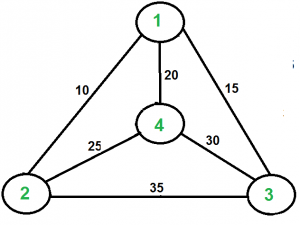

In [108]:
from sys import maxsize
from itertools import permutations
V = 4
 
# implementation of traveling Salesman Problem
def travellingSalesmanProblem(graph, s):
 
    # store all vertex apart from source vertex
    vertex = []
    for i in range(V):
        if i != s:
            vertex.append(i)
 
    # store minimum weight Hamiltonian Cycle
    min_path = maxsize
    next_permutation=permutations(vertex)
    for i in next_permutation:
 
        # store current Path weight(cost)
        current_pathweight = 0
 
        # compute current path weight
        k = s
        for j in i:
            current_pathweight += graph[k][j]
            k = j
        current_pathweight += graph[k][s]
 
        # update minimum
        min_path = min(min_path, current_pathweight)
         
    return min_path
 
 
# Driver Code
if __name__ == "__main__":
 
    # matrix representation of graph
    graph = [[0, 10, 15, 20], [10, 0, 35, 25],
            [15, 35, 0, 30], [20, 25, 30, 0]]
    s = 0
    print(travellingSalesmanProblem(graph, s))

80
